In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import pickle
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()
import matplotlib
from scipy import sparse
import scipy as sp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import umap
import scanpy as sc
import anndata
sc.settings.set_figure_params(dpi=100, facecolor='white')
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
import scanpy.external as sce
import sys
import pingouin as pg
%matplotlib inline
sc.logging.print_header()
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("white")
sns.set_style("ticks")
import sklearn.cluster as cluster
from statannot import add_stat_annotation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
neuall = sc.read_h5ad('10x_cn_neuron_mtx/cn_neurons.h5ad')
pseq = sc.read_h5ad('patchseq_mtx/patchseq.dataset.final.h5ad')

In [3]:
bushy = neuall[neuall.obs['clusters'].isin(['Bushy_Atoh7','Bushy_Hhip'])].copy()
pEN = pseq[pseq.obs['Expert_label'].isin(['Bushy','Octopus','T-stellate','Fusiform'])].copy()
sc.pp.highly_variable_genes(pEN)
sc.tl.pca(pEN, svd_solver='arpack')
sc.tl.umap(pEN)
pbushy = pEN[pEN.obs['T-cluster'].isin(['Bushy_Atoh7','Bushy_Hhip'])].copy()
pbushy = pbushy[pbushy.obs['Expert_label'].isin(['Bushy'])]
#pbushy = pbushy[pbushy.obs['recording'].isin(['good','ok'])]

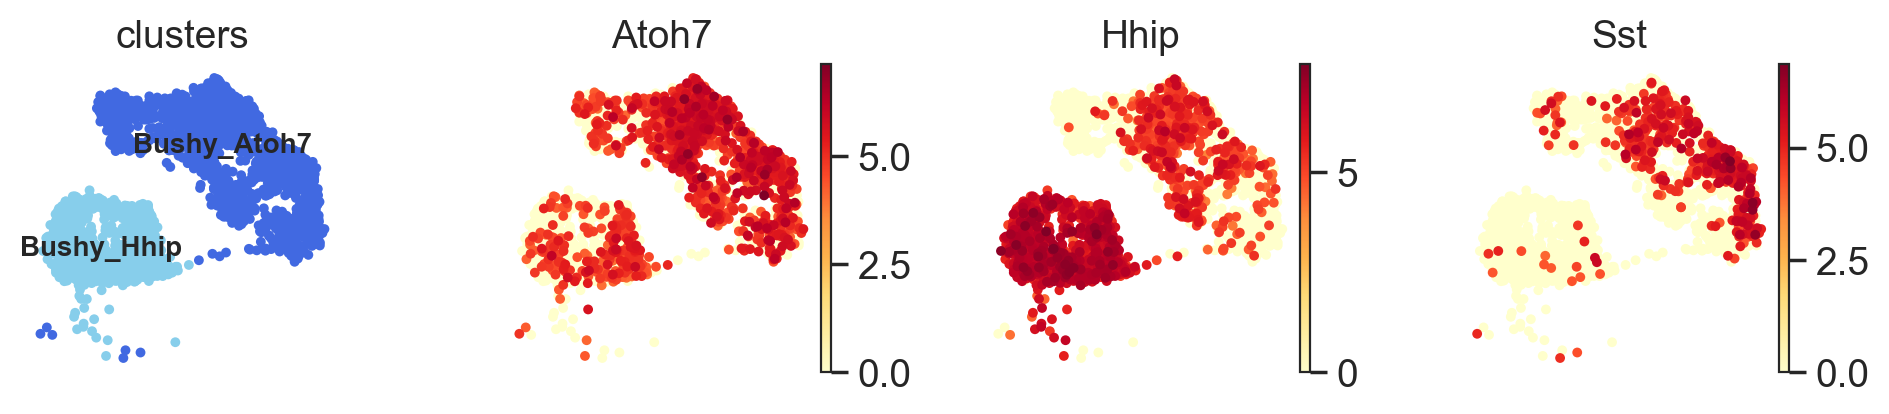

In [4]:
rcParams['figure.figsize'] = 2, 2
g = sc.pl.umap(bushy,\
               color=['clusters','Atoh7','Hhip','Sst'],\
               #use_raw = True, 
               palette = ['royalblue','skyblue'],
               legend_loc = 'on data', legend_fontsize=10,cmap = 'YlOrRd',\
               #layer = 'counts',
               sort_order =True,
               vmin=0, vmax = None,  ncols=4, show=True, frameon= False,size = 50
              )

In [6]:
pbushy.obs.loc[(pbushy.obs['10x_clusters_subclusters'] == 'Bushy-Atoh7'),'Mapping_clusters'] = 'Bushy_Atoh7'
pbushy.obs.loc[(pbushy.obs['10x_clusters_subclusters'] == 'Bushy-Hhip'),'Mapping_clusters'] = 'Bushy_Hhip'

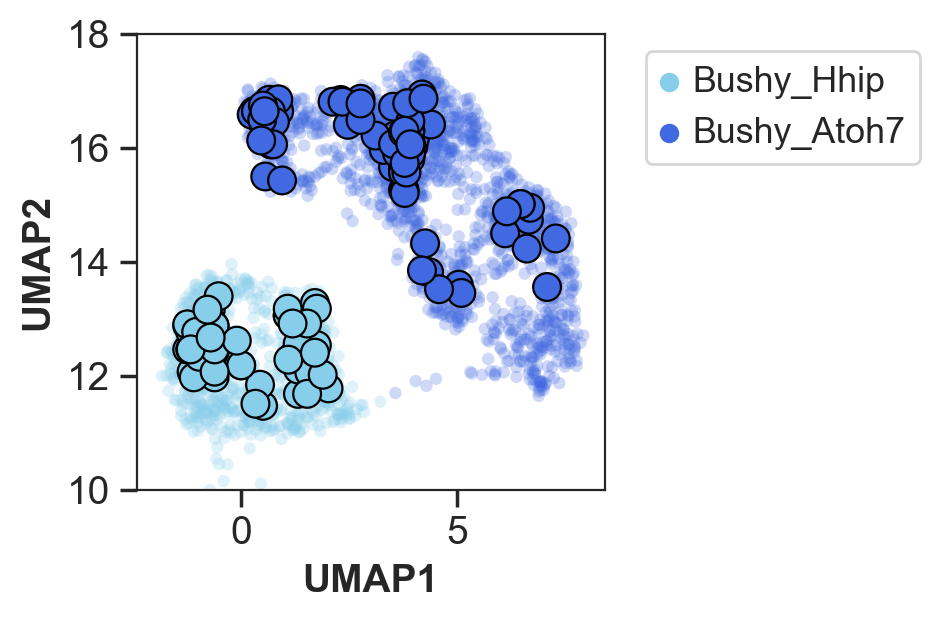

In [7]:
index = bushy.obs_names
umap1 = pd.DataFrame(bushy.obsm['X_umap'],index = index)
df = sc.get.obs_df(bushy, ['clusters'])
df['umapX']= umap1[0]
df['umapY']= umap1[1]
df = df.reset_index()


rcParams['figure.figsize'] = 3, 3
sns.scatterplot(df['umapX'],df['umapY'],s = 20,
                    hue = df['clusters'], 
                palette = ['royalblue','skyblue'],
                    edgecolor="none",legend=False,
                    alpha = 0.25)

sns.scatterplot(pbushy.obs['10x_mapping_umapX'],pbushy.obs['10x_mapping_umapY'],s = 100,
                hue =pbushy.obs['Mapping_clusters'],
                palette = ['skyblue','royalblue'],
                edgecolor="black",
               )

plt.xlabel("UMAP1",fontweight ='bold', size=14)
plt.ylabel("UMAP2", fontweight ='bold',size=14)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylim(10, 18)
plt.grid(False)

[None, None, None, None]

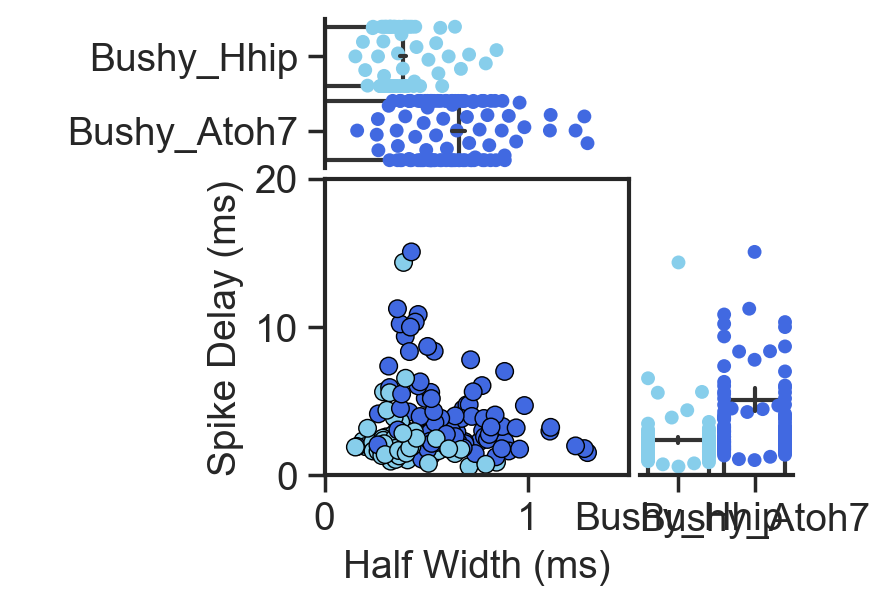

In [8]:
fig, axes= plt.subplots(2,2, gridspec_kw={'width_ratios':[1,0.5],'height_ratios':[0.5,1]})

x = pbushy.obs["Half Width (ms)"]
y = pbushy.obs["Spike Delay (ms)"]
cluster = pbushy.obs["Mapping_clusters"]

palette = {'Bushy_Atoh7': 'royalblue', 'Bushy_Hhip': 'skyblue'}
g1 = sns.barplot( x =  x , y = cluster, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",\
                linewidth=1.5,ci=68,errwidth = 1.5,ax = axes[0,0],)
g1 = sns.swarmplot( x =  x , y =  cluster, size=5.0,
                   palette=palette,zorder=1,ax = axes[0,0],)
g1.set_ylabel(' ')
g1.set_xlabel(' ')
g1.set_xlim(0, 1.50) 
g1.set_xticks([])
g1.spines["right"].set_visible(False)
g1.spines["bottom"].set_visible(False)
g1.spines["top"].set_visible(False)

g2 = sns.scatterplot(x, y, s=40,hue =cluster,palette=palette,edgecolor="black",legend = False,ax = axes[1,0])
g2.set_xlim(0, 1.50) 
g2.set_ylim(0, 20) 


g3 = sns.barplot( x = cluster , y = y, facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",\
                linewidth=1.5,ci=68,errwidth = 1.5,ax = axes[1,1],)
g3 = sns.swarmplot(x =  cluster , y = y,size=5.0,
                   palette=palette,zorder=1,ax = axes[1,1],)
g3.set_xlabel(' ')
g3.set_ylabel(' ')
g3.set_ylim(0, 20) 
g3.set_yticks([])

g3.spines["right"].set_visible(False)
g3.spines["left"].set_visible(False)
g3.spines["top"].set_visible(False)

g4 = axes[0,1]
g4.axis('off')

fig.subplots_adjust(wspace=0.05)
fig.subplots_adjust(hspace=0.05)

plt.setp(g1.spines.values(), linewidth=1.5)
plt.setp(g2.spines.values(), linewidth=1.5)
plt.setp(g3.spines.values(), linewidth=1.5)
#plt.savefig('Bushy_Ephysi.pdf',dpi = 300)
#plt.savefig('Bushy_Ephysi.png',dpi = 300)

In [9]:
df = pd.DataFrame()
df['Half Width (ms)'] = pbushy.obs["Half Width (ms)"]
df['Spike Delay (ms)'] = pbushy.obs["Spike Delay (ms)"]
df['cluster'] = pbushy.obs["Mapping_clusters"]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Bushy_Hhip v.s. Bushy_Atoh7: t-test independent samples with Bonferroni correction, P_val=1.158e-10 stat=-6.858e+00


(<AxesSubplot:xlabel='cluster', ylabel='Half Width (ms)'>,
 [<statannot.StatResult.StatResult at 0x1b489b81f40>])

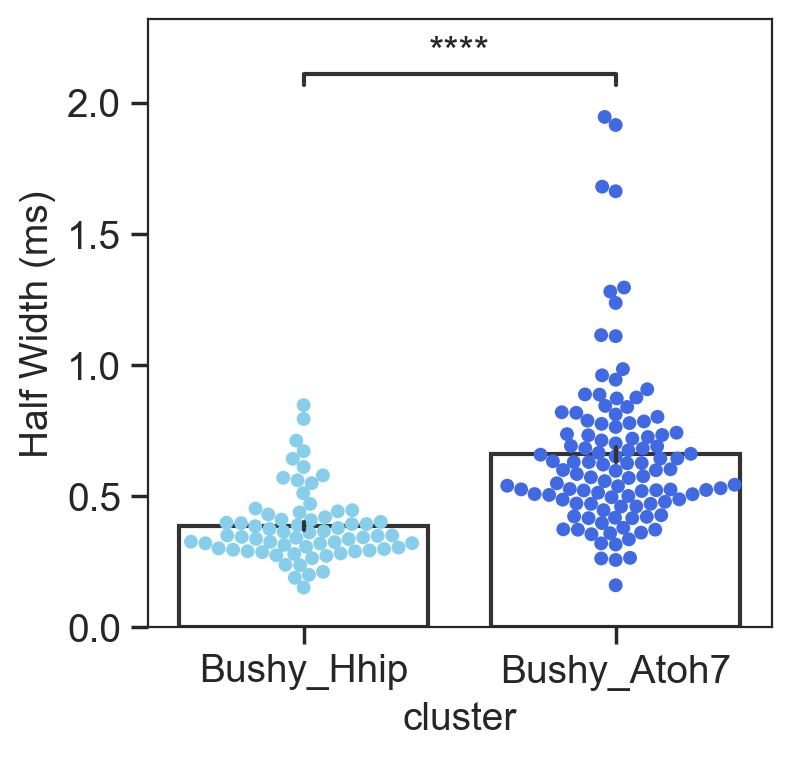

In [10]:
rcParams['figure.figsize'] = 4, 4

g1 = sns.barplot( x =  df['cluster'], y = df['Half Width (ms)'], facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",\
                linewidth=1.5,ci=68,errwidth = 1.5)
g1 = sns.swarmplot( x =  df['cluster'], y = df['Half Width (ms)'],size=5.0,
                   palette=palette,zorder=1)

add_stat_annotation(g1,  x =  df['cluster'], y = df['Half Width (ms)'],
                    box_pairs=[("Bushy_Atoh7", "Bushy_Hhip")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Bushy_Hhip v.s. Bushy_Atoh7: t-test independent samples with Bonferroni correction, P_val=7.032e-03 stat=-2.727e+00


(<AxesSubplot:xlabel='cluster', ylabel='Spike Delay (ms)'>,
 [<statannot.StatResult.StatResult at 0x1b489bdcfd0>])

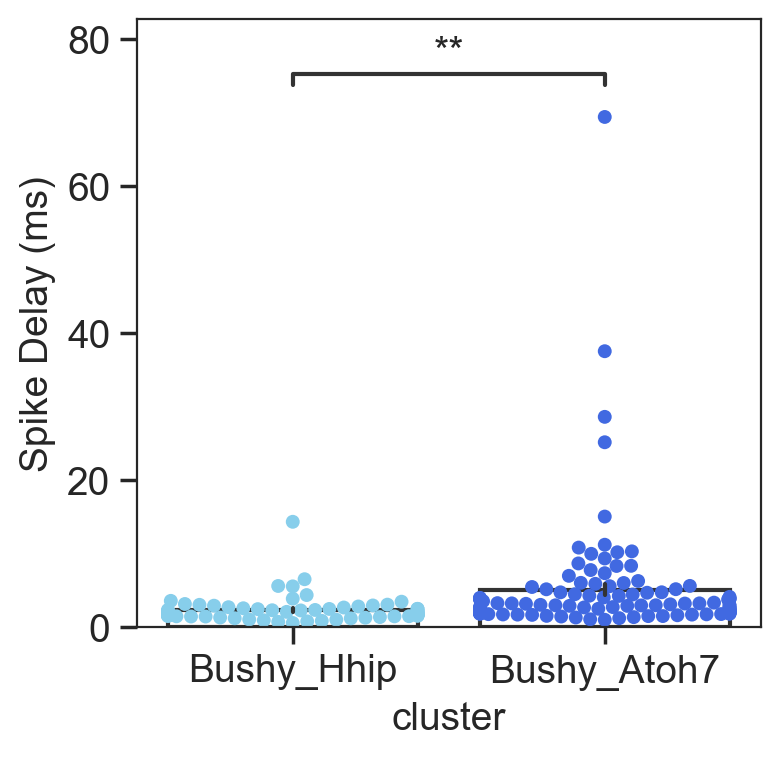

In [11]:
rcParams['figure.figsize'] = 4, 4

g1 = sns.barplot( x =  df['cluster'], y = df['Spike Delay (ms)'], facecolor=(1, 1, 1, 0),errcolor=".2", edgecolor=".2",\
                linewidth=1.5,ci=68,errwidth = 1.5)
g1 = sns.swarmplot( x =  df['cluster'], y = df['Spike Delay (ms)'],size=5.0,
                   palette=palette,zorder=1)

add_stat_annotation(g1,  x =  df['cluster'], y = df['Spike Delay (ms)'],
                    box_pairs=[("Bushy_Atoh7", "Bushy_Hhip")],
                   test='t-test_ind', text_format='star', verbose=2)#, loc='outside'

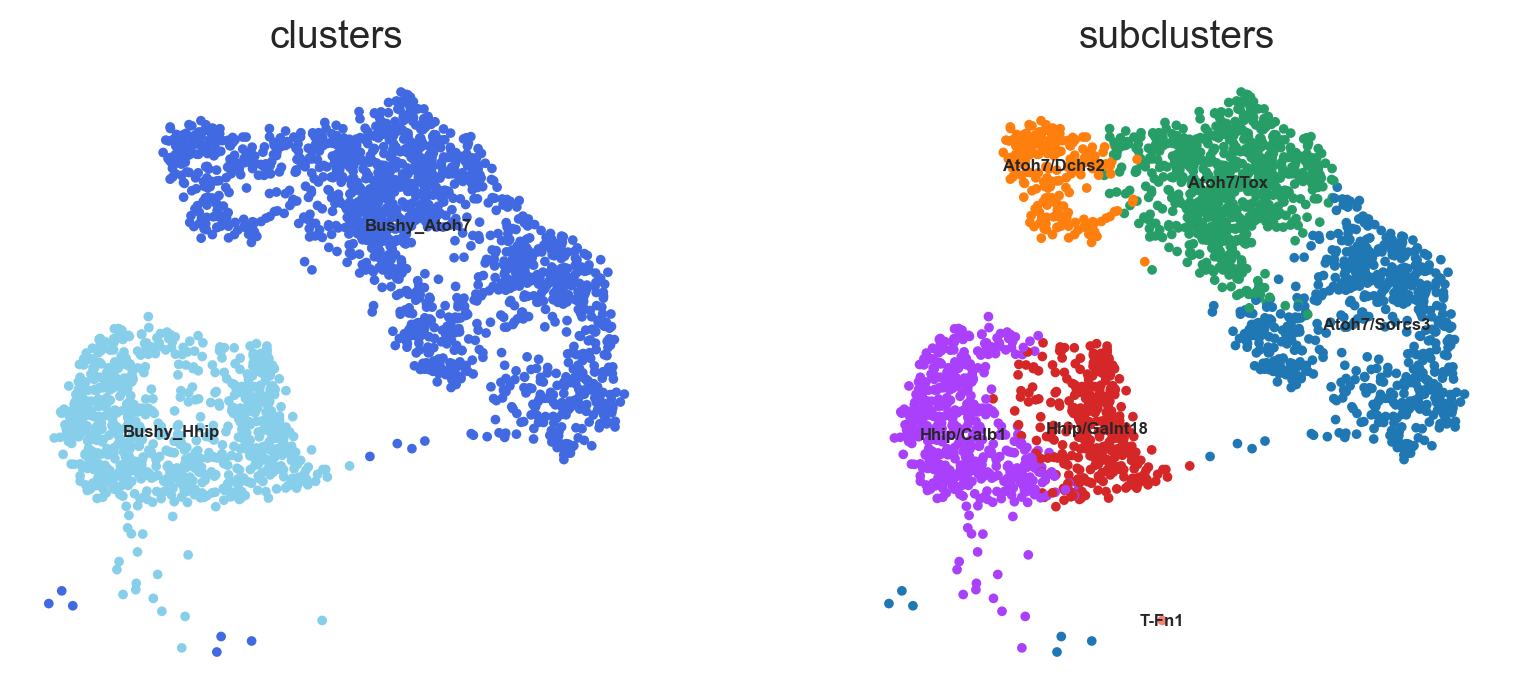

In [12]:
sc.pl.umap(bushy,color=['clusters','subclusters'],
           legend_loc = 'on data', legend_fontsize=6,frameon = False
           )

In [13]:
mdata = pd.read_csv('Morpholoy_data.csv')
mdata =mdata[mdata['10x_clusters_subclusters'].isin(['Bushy-Atoh7','Bushy-Hhip'])]
mdata =mdata[mdata['Expert_label'].isin(['Bushy'])]
mdata = mdata.fillna(0)

intersection = mdata.loc[:,"intersection_10":"intersection_440"]
intersection['10x_clusters_subclusters']  = mdata['10x_clusters_subclusters']
intersection['Cell']= mdata['Cell']
intersection = intersection.reset_index()
del intersection['index']
df = pd.DataFrame(columns =['Cell','Types','Radius','Intersection'])

for i in range(0,71,1):
    df1 = pd.DataFrame(columns =['Cell','Types','Radius','Intersection'])
    df1['Intersection'] = intersection.loc[:,"intersection_10":"intersection_440"].iloc[i].values*1.0
    df1['Radius'] = range(10,450,10)
    df1['Types'] = intersection['10x_clusters_subclusters'].iloc[i]
    df1['Cell'] = intersection['Cell'].iloc[i]
    df = df.append(df1) 

df = df.reset_index()
del df['index']

Text(0, 0.5, 'Intersections')

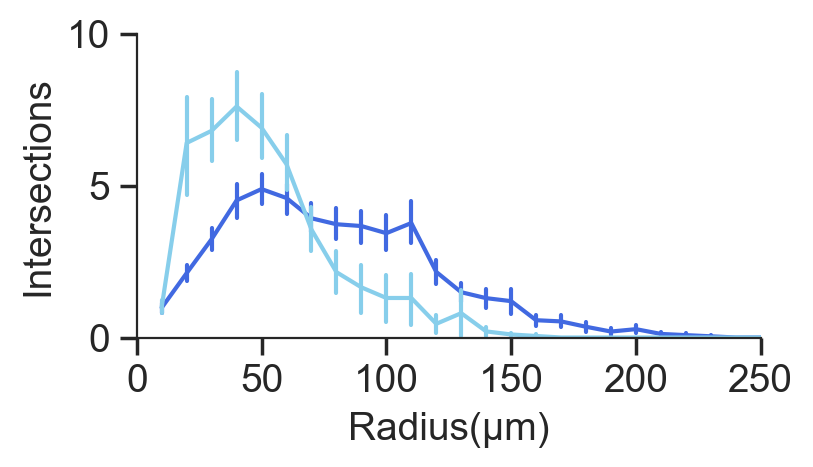

In [14]:
rcParams['figure.figsize'] = 4, 2

ax = sns.lineplot(x=df["Radius"], y=df["Intersection"],hue = df['Types'],err_style="bars", ci=68,\
            palette = {'Bushy-Atoh7': 'royalblue', 'Bushy-Hhip': 'skyblue'})
ax.get_legend().remove()
plt.xlim(0, 250)
plt.ylim(0, 10)
sns.despine()
plt.xlabel("Radius(μm)", size=14)
plt.ylabel("Intersections", size=14)
#plt.savefig('Bushy_Sholl_Intersection.pdf',dpi = 300)
#plt.savefig('Bushy_Sholl_Intersection.png',dpi = 300)

In [15]:
pg.mixed_anova(data = df[df['Radius'] <= 60.0],
                dv='Intersection',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,475.097634,1,69,475.097634,19.638052,3.437371e-05,0.221553,NaN
1,Radius,1022.976526,5,345,204.595305,18.568521,2.433352e-16,0.212046,0.499547
2,Interaction,184.343736,5,345,36.868747,3.346109,5.770404e-03,0.046251,NaN


In [16]:
length = mdata.loc[:,"length_10":"length_440"]
length['10x_clusters_subclusters']  = mdata['10x_clusters_subclusters']
length['Cell']= mdata['Cell']
length = length.reset_index()
del length['index']
df = pd.DataFrame(columns =['Cell','Types','Radius','length'])

for i in range(0,71,1):
    df1 = pd.DataFrame(columns =['Cell','Types','Radius','length'])
    df1['length'] = length.loc[:,"length_10":"length_440"].iloc[i].values*1.0
    df1['Radius'] = range(10,450,10)
    df1['Types'] = length['10x_clusters_subclusters'].iloc[i]
    df1['Cell'] = length['Cell'].iloc[i]
    df = df.append(df1) 

df = df.reset_index()
del df['index']

Text(0, 0.5, 'Length(μm)')

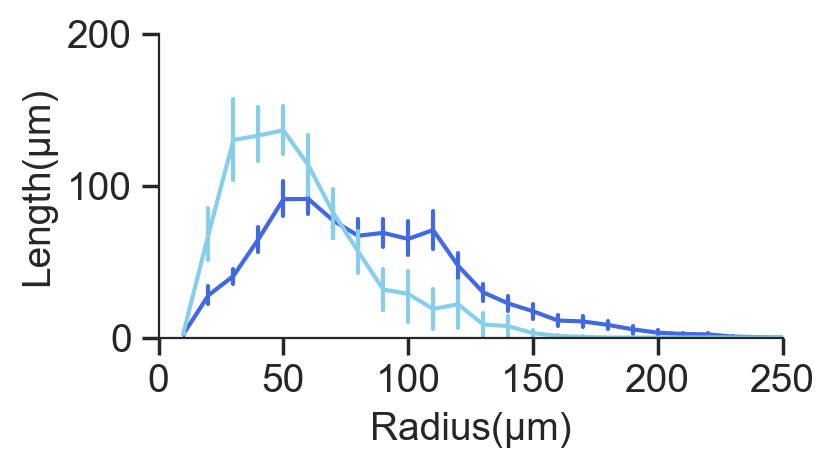

In [17]:
rcParams['figure.figsize'] = 4, 2
ax = sns.lineplot(x=df["Radius"], y=df["length"],hue = df['Types'],err_style="bars", ci=68,\
             palette = {'Bushy-Atoh7': 'royalblue', 'Bushy-Hhip': 'skyblue'})
plt.xlim(0, 250)
plt.ylim(0, 200)
ax.get_legend().remove()
sns.despine()
plt.xlabel("Radius(μm)", size=14)
plt.ylabel("Length(μm)", size=14)
#plt.savefig('Bushy_Sholl_Length.pdf',dpi = 300)
#Eplt.savefig('Bushy_Sholl_Length.png',dpi = 300)

In [18]:
pg.mixed_anova(data = df[df['Radius'] <= 60.0],
                dv='length',
               between='Types',
               within='Radius',
               subject='Cell',
               correction= False)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Types,169566.541509,1,69,169566.541509,21.937914,1.367092e-05,0.241241,NaN
1,Radius,530675.867427,5,345,106135.173485,29.807105,3.670435e-25,0.301670,0.47777
2,Interaction,71886.233726,5,345,14377.246745,4.037720,1.419596e-03,0.055283,NaN


In [19]:
paras = ['Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)',
'RMP (mV)', 'RheoBase (pA)', 'Spike Delay (ms)','Threshold (mV)', 
'Amplitude (mV)', 'AHP (mV)','Depolarization Time (ms)', 'Repolarization Time (ms)', 
'Half Width (ms)','Max Spike Number', 
'AP Number @ 2xRheabase',  'Spike_Delay @ 2xRheobase'
        ]

In [20]:
adata = pbushy.obs[[
'SagRatio', 'Rebound (mV)', 'Spike Delay (ms)', 'Threshold (mV)', 'AHP (mV)', 'Depolarization Time (ms)',
    'Repolarization Time (ms)', 'Half Width (ms)', 'AP Number @ 2xRheabase', 'Spike_Delay @ 2xRheobase'
        ]]
scaled_features = StandardScaler().fit_transform(adata.values)

([], [])

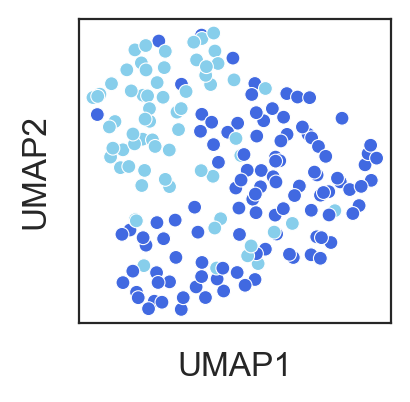

In [21]:
embedding = umap.UMAP(random_state = 0, min_dist = 0.5, n_components = 2, n_neighbors = 10).fit_transform(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1],             
               hue = pbushy.obs['Mapping_clusters'],
               palette = {'Bushy_Atoh7': 'royalblue', 'Bushy_Hhip': 'skyblue'},
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('Bushy-e-cluster.png',dpi = 300)

In [22]:
import sklearn.cluster as cluster

([], [])

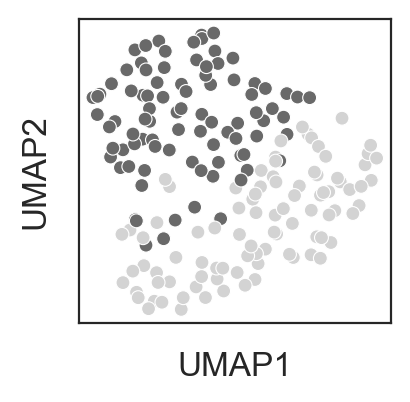

In [23]:
kmeans_labels = cluster.KMeans(n_clusters=2,random_state=17).fit_predict(scaled_features)
rcParams['figure.figsize'] = 2, 2
sns.scatterplot(x = embedding[:, 0], 
               y = embedding[:, 1], 
                palette = ['dimgray','lightgray'],
               hue = kmeans_labels,
               s=25,legend = False);
plt.xlabel("UMAP1", size=12)
plt.ylabel("UMAP2", size=12)
plt.xticks([])
plt.yticks([])
#plt.savefig('bushy_ecluster_kmeans.png',dpi = 300)

In [24]:
df = pd.DataFrame()
df['T_clusters'] =   list(pbushy.obs['Mapping_clusters'])
df['pred'] = kmeans_labels
df.loc[df['pred'] == 0, 'pred_label'] = 'cluster0'
df.loc[df['pred'] == 1, 'pred_label'] = 'cluster1'
matchPairs = df.groupby(['T_clusters','pred']).count()
pCts  = ['Bushy_Atoh7','Bushy_Hhip']
kCts = [0,1]
mapping = pd.DataFrame(index = pCts, columns = kCts)
mapping= mapping.fillna(0.0)
for names in pCts:
    count = matchPairs.loc[names].sum()
    name = list(matchPairs.loc[names].index)
    for n in name:
        mapping.loc[names][n] = matchPairs.loc[names,n]/count*100

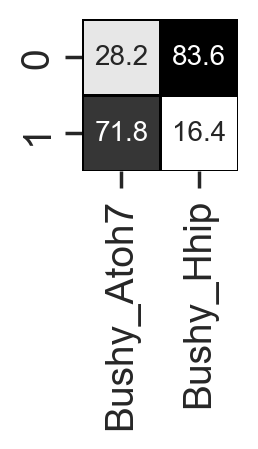

In [25]:
rcParams['figure.figsize'] = 1.0, 1.0
ax = sns.heatmap(mapping.T, cmap='Greys',cbar=False,
                 linewidths=1, linecolor='black',annot = True, annot_kws = {'size':10},fmt='0.1f'
                )
#plt.savefig('bushy_subcluster_kmeans_cm.pdf',dpi = 300)

In [26]:
sc.tl.rank_genes_groups(bushy, groupby ='clusters')
marker = pd.DataFrame(bushy.uns['rank_genes_groups']['names']).head(200)

In [27]:
from numpy import random

In [28]:
gene_list = pd.DataFrame(bushy.uns['rank_genes_groups']['names'])
p_adj = pd.DataFrame(bushy.uns['rank_genes_groups']['pvals_adj'])
fc = pd.DataFrame(bushy.uns['rank_genes_groups']['logfoldchanges'])
df = pd.DataFrame()
df['genes'] = gene_list['Bushy_Hhip']
df['pvals_adj'] = p_adj['Bushy_Hhip']
df['logfoldchanges'] = fc['Bushy_Hhip']
up_flag = df['logfoldchanges'] >= 1
down_flag = df['logfoldchanges'] <= -1
sig_lag = df['pvals_adj'] < 0.01
df.loc[(up_flag & sig_lag),'category'] = 'Up'
df.loc[(down_flag & sig_lag),'category'] = 'Down'
df.loc[((df['category'] != 'Up') & (df['category'] != 'Down')), 'category'] = 'not significant'
df['gene'] = df['genes']
df = df.set_index(['genes'])
df['-log10(pvals_adj)'] = np.log10(df['pvals_adj'])*-1
random.seed(7)
df.loc[df['pvals_adj'] == 0,'-log10(pvals_adj)'] = 307 + random.randint(100, size=(len(df.loc[df['pvals_adj'] == 0])))

In [29]:
palette={'Up':'skyblue','Down':'royalblue',
         'not significant':'gray'}

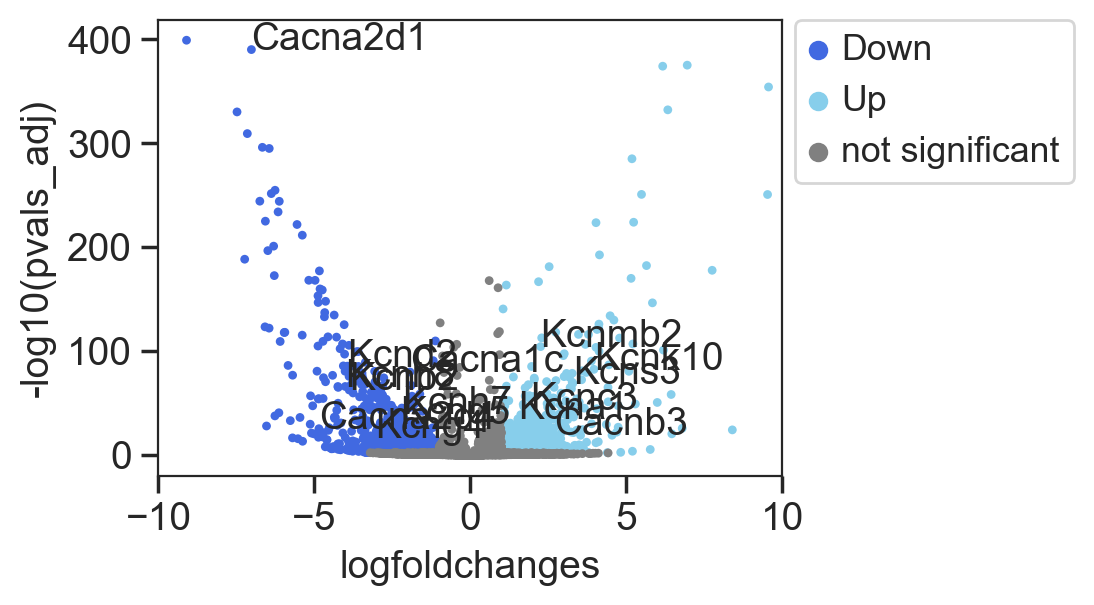

In [30]:
rcParams['figure.figsize'] =4, 3
df = df.sort_values(by=['category'])
ax = sns.scatterplot(x = df['logfoldchanges'],y = df['-log10(pvals_adj)'],
                     edgecolor="none",
                     hue = df['category'],
                     palette=palette,
                     s=10)
plt.xlabel('logfoldchanges')
plt.ylabel('-log10(pvals_adj)')
plt.xlim(-10,10)
#plt.ylim(-0,250)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
genes = [
'Cacna1c',#Cav1.2 L Cardiac myocytes, smooth muscle myocytes, endocrine cells, neuronal cell bodies, proximal dendrites
'Cacna2d1',#calcium voltage-gated channel auxiliary subunit alpha2delta
'Kcnk10',#K2P10.1
'Kcnb2',#Kv2.2 Shab-like
'Kcnc3',#Kv3.3 Shal-like 
'Kcnd2',#Kv4.2 Shaw-like
'Kcns3',#Kv9.3
'Kcnh8',#Kv12.1
'Kcnmb2',
'Kcng4',
'Kcna1',
'Kcnq5',
'Kcnh7',
'Cacna2d4',
    'Cacnb3'
        ]
for gene in genes:
    y = df.loc[gene]['-log10(pvals_adj)']
    x = df.loc[gene]['logfoldchanges']
    ax.text(x,y,gene)
#plt.savefig('bushy_vocano.png',dpi = 300)

In [31]:
genes_list = []
for i in range(0,2,1):
    types = ['Bushy_Atoh7', 'Bushy_Hhip']
    types = sorted(types)
    detected_type = types[i]
    df = sc.get.obs_df(bushy, list(marker[detected_type])+['clusters'])
    types.remove(detected_type)
    j = 0
    for gene in list(marker[detected_type]):
        p = pd.DataFrame(columns = types, index =['mean_df'])
        for type1 in types:
            a = df[df['clusters'].isin([detected_type])][gene]
            b = df[df['clusters'].isin([type1])][gene]
            if b.mean() != 0:
                p.iloc[0][type1] = a.mean()/b.mean()
            else:
                p.iloc[0][type1] =100.0
        if p.iloc[0].min() > 2.5:
            genes_list.append(gene)
            j = j + 1
            if j >= 10:
                break
df = sc.get.obs_df(bushy, genes_list+['clusters'])
df.iloc[:, 0:-1] = df.iloc[:, 0:-1]/df.iloc[:, 0:-1].max()

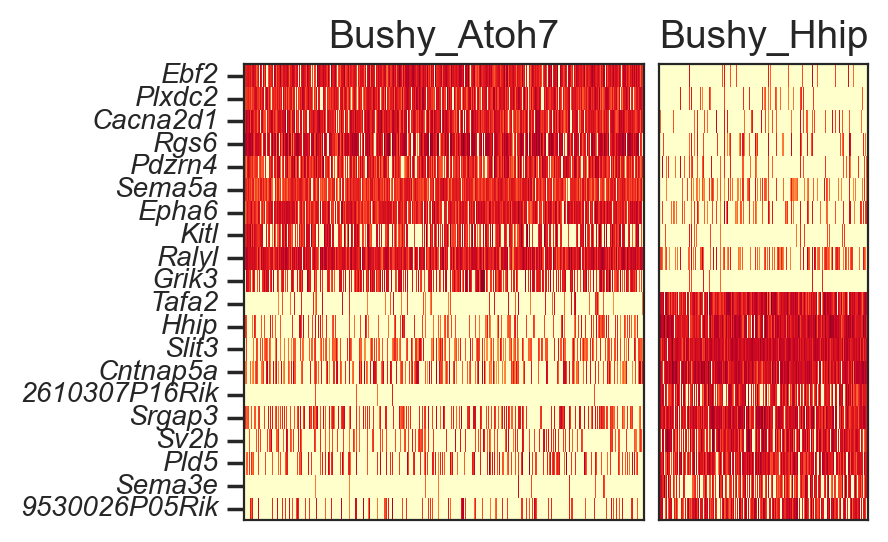

In [32]:
rcParams['figure.figsize'] = 4, 3
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios':[1613,846]})

cluster = sorted(['Bushy_Atoh7', 'Bushy_Hhip'])
vmax = 1
vmin = 0
g = sns.heatmap(df[df['clusters'].isin([cluster[0]])].iloc[:, 0:-1].T,
                yticklabels=1,vmax = vmax,vmin = vmin,
                cmap="YlOrRd",cbar=False,ax=axes[0])
g.set_xlabel('')
g.set_title(cluster[0],
            rotation=0, horizontalalignment='center'
           )
g.tick_params(bottom=False)
i = 1
for lab in g.get_yticklabels():
    lab.set_style("italic")
    lab.set_fontsize(10)
for clust in cluster[1:5]:
    g = sns.heatmap(df[df['clusters'].isin([cluster[i]])].iloc[:, 0:-1].T,
                    cmap="YlOrRd",vmax = vmax,vmin = vmin,
                    cbar=False,ax=axes[i])
    g.set_xlabel('')
    g.set_ylabel('')
    g.set_yticks([])
    g.set_title(clust,
                rotation=0, horizontalalignment='center'
               )
    g.tick_params(bottom=False)

fig.subplots_adjust(wspace=0.05)
sns.despine(top = False, right = False, left = False,bottom = False)
for ax in axes:
    ax.set_xticklabels('')
#plt.savefig('bushy_heatmap.png',dpi = 150)

In [62]:
df = pbushy.obs
palette = {'Bushy_Atoh7': 'royalblue',
           'Bushy_Hhip': 'skyblue'}
data = df[['Mapping_clusters','epsc_rise_time (ms)',
       'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)',
       'epsc_amp (pA)']]
data = data.dropna()
par = ['epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)','epsc_amp (pA)']

In [67]:
data.groupby('Mapping_clusters').count()

,epsc_rise_time (ms),epsc_half_width (ms),epsc_decay_tau (ms),epsc_freq (Hz),epsc_amp (pA)
Mapping_clusters,,,,,
Bushy_Atoh7,101,101,101,101,101
Bushy_Hhip,59,59,59,59,59


In [34]:
import scipy.stats as stats

0.09025557380552542 rank-sum


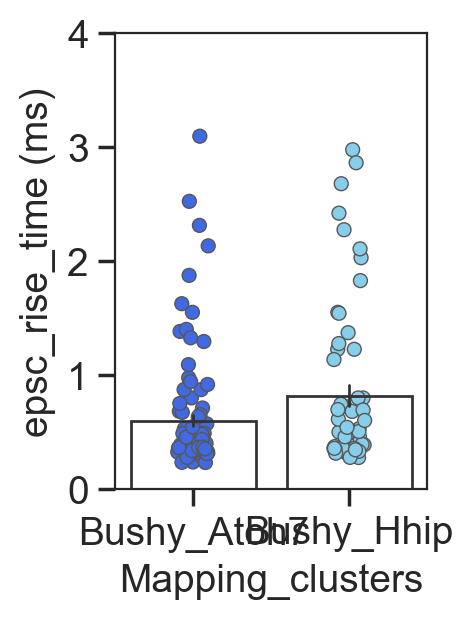

In [35]:
name = par[0]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,4])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.053701355976688556 rank-sum


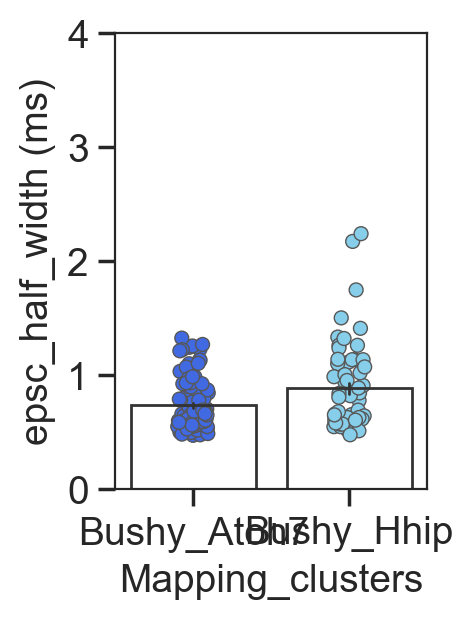

In [36]:
name = par[1]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,4])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.04289540024589742 rank-sum


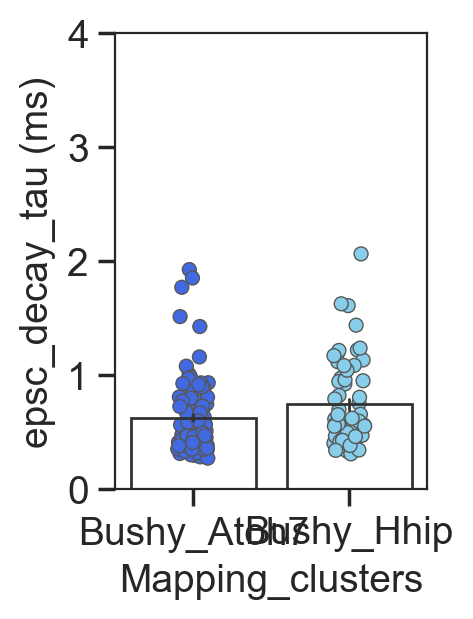

In [37]:
name = par[2]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,4])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.004059242046878101 rank-sum


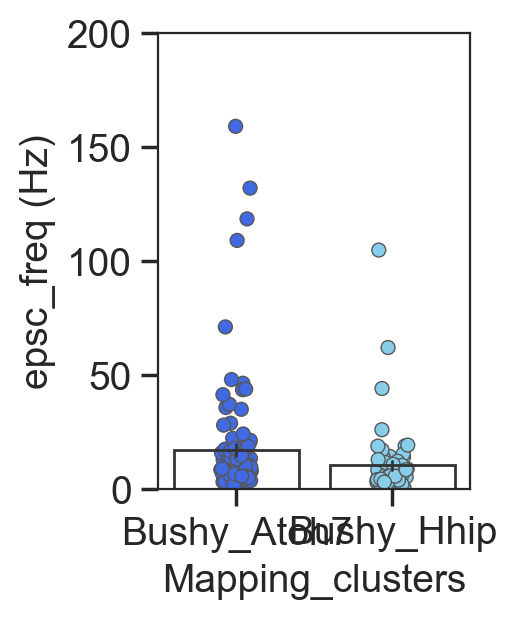

In [38]:
name = par[3]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,200])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.9056893396869007 rank-sum


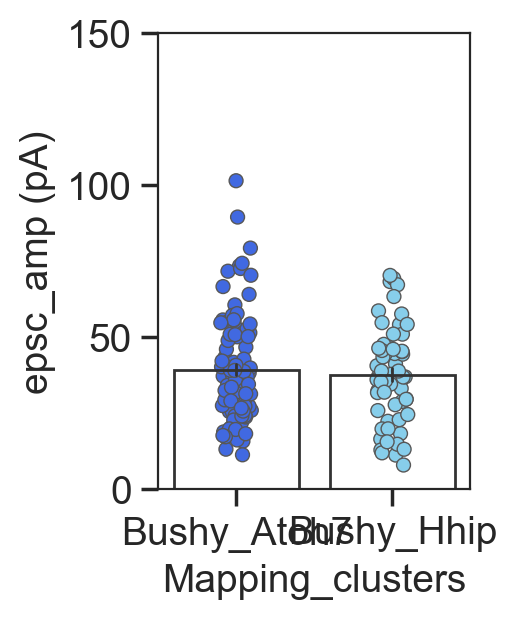

In [39]:
name = par[4]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,150])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

In [40]:
DIR = 'E:/final_dataset/EPSC_analysis/'

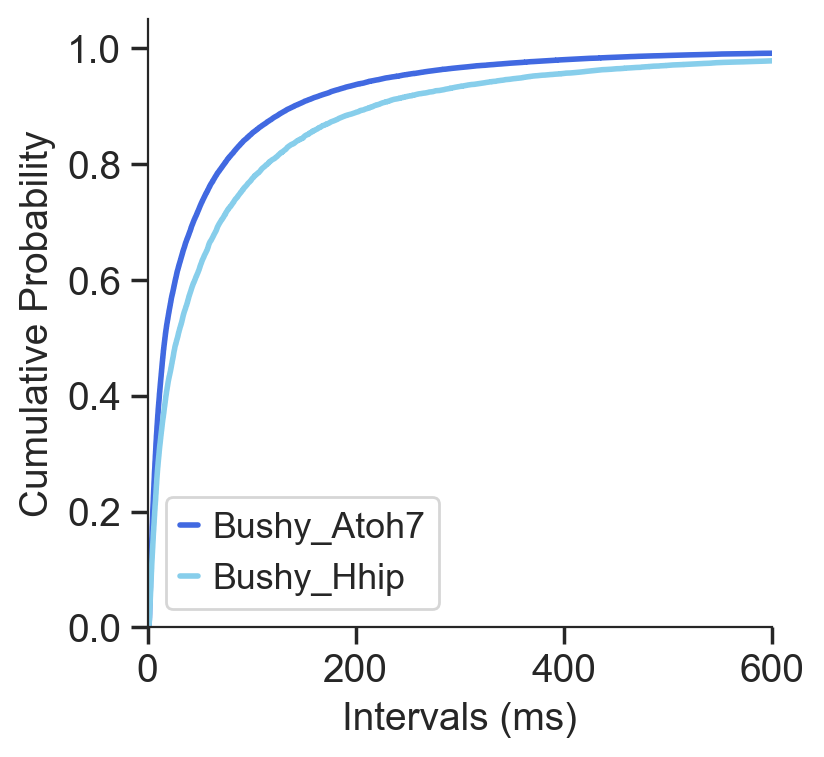

In [41]:
bea = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_EPSC_Intervals.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Hhip'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_EPSC_Intervals.csv', header = None))

rcParams['figure.figsize'] = 4, 4
x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "Bushy_Atoh7",color = 'royalblue',linewidth=2)
ax = plt.plot(x1, y1,label = "Bushy_Hhip",color = 'skyblue',linewidth=2)
plt.legend()
plt.xlabel('Intervals (ms)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 600])
plt.ylim([0,1.05])
plt.savefig('sp/EPSC_Cumulative_freq.pdf',dpi = 300)

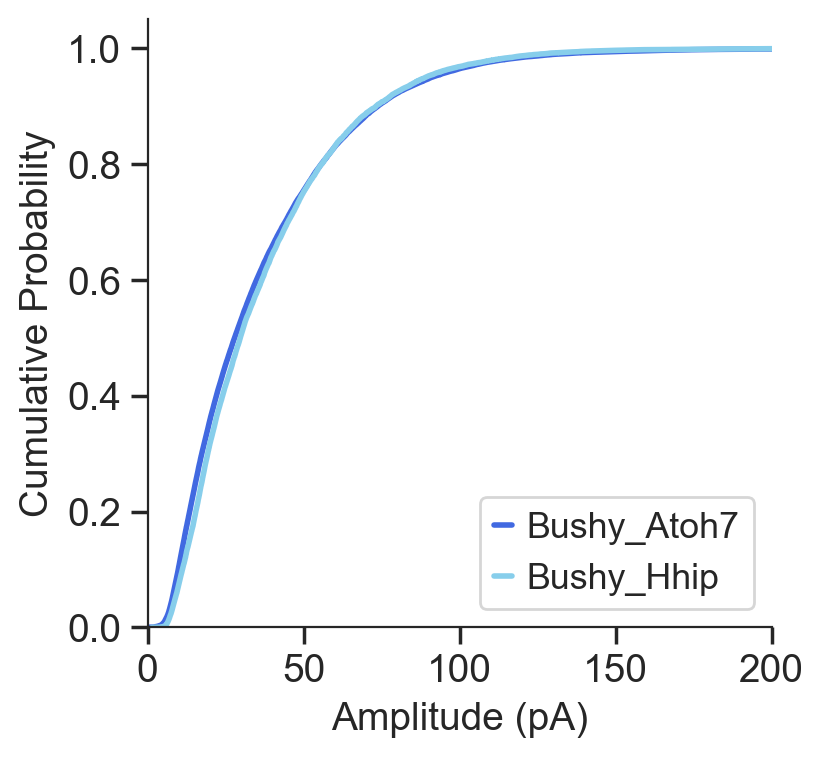

In [42]:
bea = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])].index):
    bea = bea.append(pd.read_csv(DIR + fn + '_EPSC_amplitudes.csv', header = None))
    
beh = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Hhip'])].index):
    beh = beh.append(pd.read_csv(DIR + fn + '_EPSC_amplitudes.csv', header = None))

bea = bea*-1.0
beh = beh*-1.0

rcParams['figure.figsize'] = 4, 4

x = np.sort(bea.sort_values(by = [0])[0])
y = np.arange(len(bea)) / float(len(bea))
x1 = np.sort(beh.sort_values(by = [0])[0])
y1 = np.arange(len(beh)) / float(len(beh))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "Bushy_Atoh7",color = 'royalblue',linewidth=2)
ax = plt.plot(x1, y1,label = "Bushy_Hhip",color = 'skyblue',linewidth=2)
plt.legend()
plt.xlabel('Amplitude (pA)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 200])
plt.ylim([0,1.05])
plt.savefig('sp/EPSC_Cumulative_amp.pdf',dpi = 300)

In [68]:
df = pbushy.obs
palette = {'Bushy_Atoh7': 'royalblue',
           'Bushy_Hhip': 'skyblue'}
data = df[['Mapping_clusters', 'ipsc_rise_time (ms)', 'ipsc_half_width (ms)',
       'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)']]
data = data.dropna()
par = [ 'ipsc_rise_time (ms)', 'ipsc_half_width (ms)',
       'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)',]

In [69]:
data.groupby('Mapping_clusters').count()

,ipsc_rise_time (ms),ipsc_half_width (ms),ipsc_decay_tau (ms),ipsc_freq (Hz),ipsc_amp (pA)
Mapping_clusters,,,,,
Bushy_Atoh7,100,100,100,100,100
Bushy_Hhip,58,58,58,58,58


0.007805762572469098 rank-sum


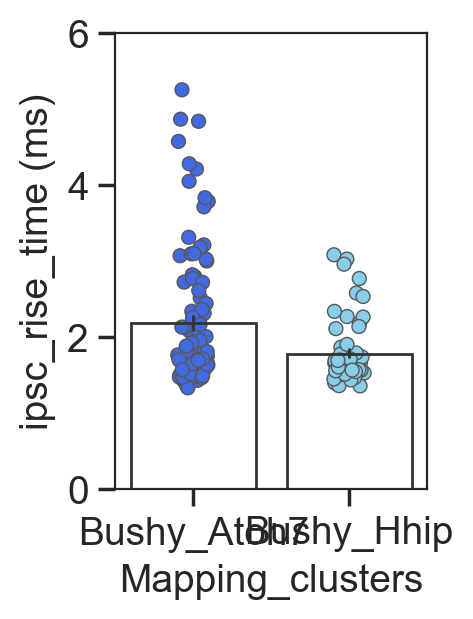

In [70]:
name = par[0]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,6])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.13722801641282237 rank-sum


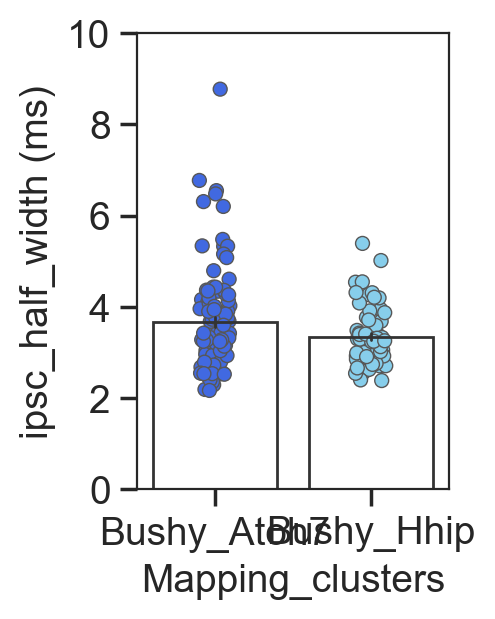

In [45]:
name = par[1]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,10])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.3318699093340579 rank-sum


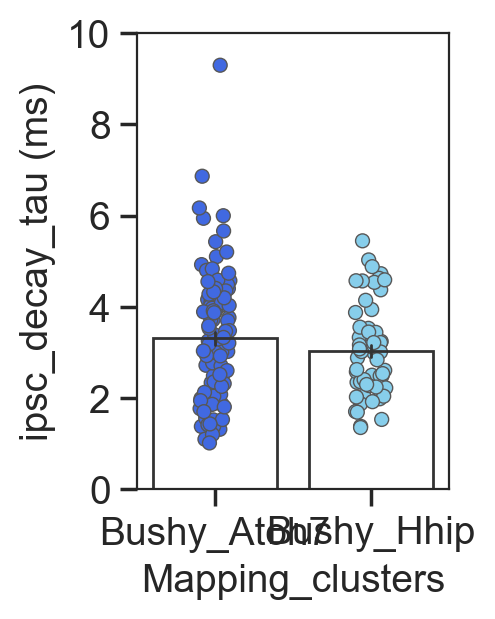

In [46]:
name = par[2]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,10])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.015044888828676831 rank-sum


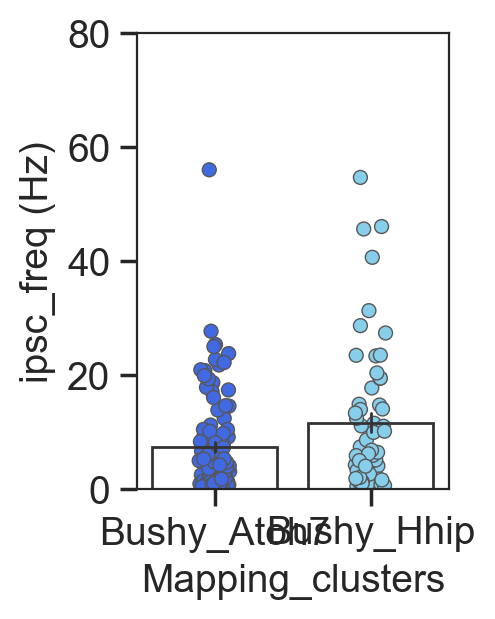

In [47]:
name = par[3]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,80])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

0.009202307482974957 rank-sum


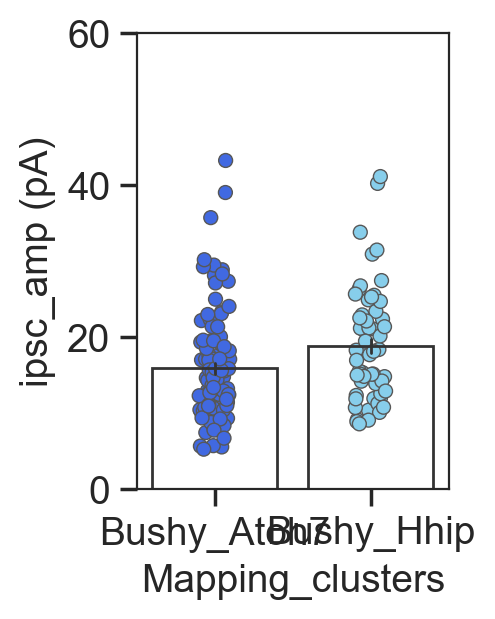

In [48]:
name = par[4]
a = data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])][name]
b = data[data['Mapping_clusters'].isin(['Bushy_Hhip'])][name]
s1, p1 = stats.normaltest(a)
s2, p2 = stats.normaltest(b)
s3, p3 = stats.levene(a,b)

if p1 >= 0.001 and p2 >= 0.001:
    if p3 >= 0.001:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
        t_method = 't-test_ind'
    else:
        s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
        t_method = 't-test_welch'
else:
    s, p = scipy.stats.ranksums(a,b)
    t_method = 'rank-sum'

rcParams['figure.figsize'] = 2, 3
np.random.seed(7)
ax =  sns.stripplot(x = data['Mapping_clusters'], y = data[name],
                    order =['Bushy_Atoh7','Bushy_Hhip'],
                   linewidth=0.5,s = 5,zorder=1,
                   palette = palette
                  )
ax = sns.barplot(x = data['Mapping_clusters'], y = data[name],
                 order =['Bushy_Atoh7','Bushy_Hhip'],
            facecolor=(0, 0, 0, 0),errcolor=".2", edgecolor=".2",\
            linewidth=1.0,ci=68,errwidth = 1.0)
plt.ylim([0,60])

print(p,t_method)
plt.savefig('sp/'+name+'.pdf',dpi = 300)

In [50]:
DIR = 'E:/final_dataset/IPSC_analysis/'

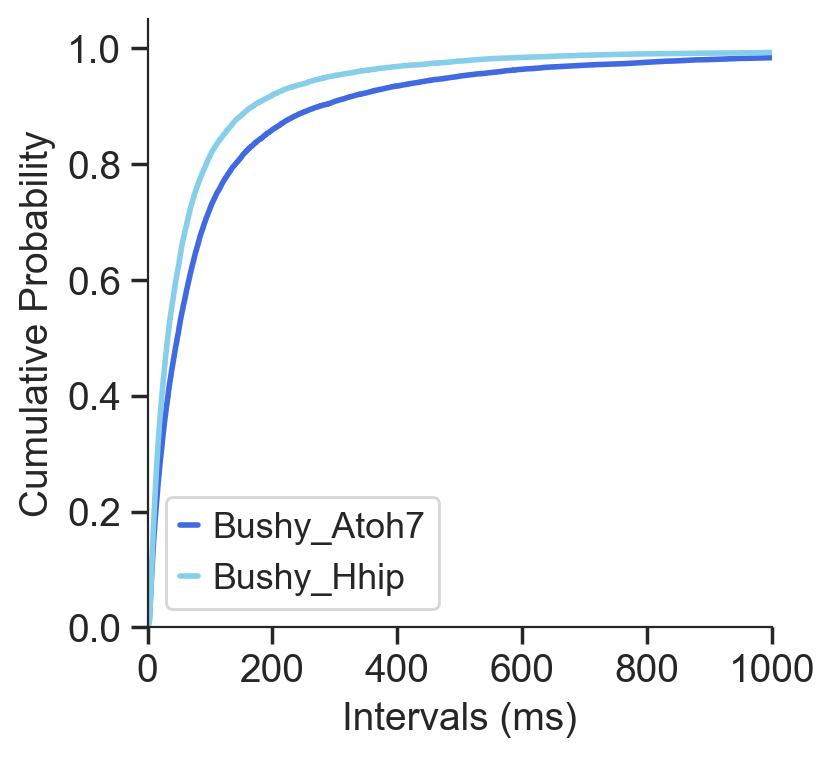

In [51]:
bia = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])].index):
    bia = bia.append(pd.read_csv(DIR + fn + '_IPSC_Intervals.csv', header = None))
    
bih = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Hhip'])].index):
    bih = bih.append(pd.read_csv(DIR + fn + '_IPSC_Intervals.csv', header = None))

rcParams['figure.figsize'] = 4, 4
x = np.sort(bia.sort_values(by = [0])[0])
y = np.arange(len(bia)) / float(len(bia))
x1 = np.sort(bih.sort_values(by = [0])[0])
y1 = np.arange(len(bih)) / float(len(bih))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "Bushy_Atoh7",color = 'royalblue',linewidth=2)
ax = plt.plot(x1, y1,label = "Bushy_Hhip",color = 'skyblue',linewidth=2)
plt.legend()
plt.xlabel('Intervals (ms)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 1000])
plt.ylim([0,1.05])
plt.savefig('sp/IPSC_Cumulative_freq.pdf',dpi = 300)

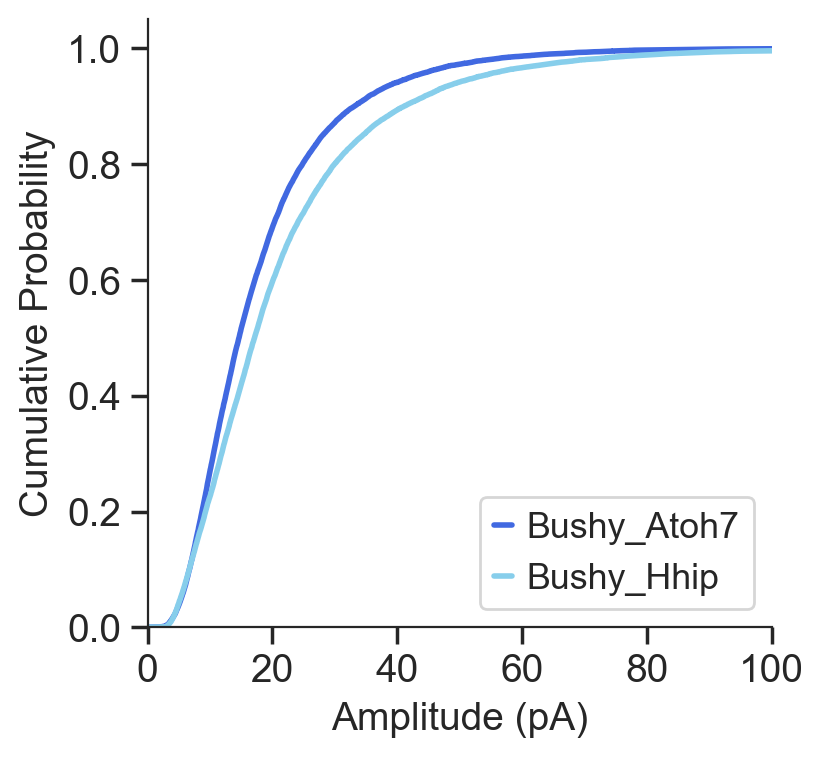

In [52]:
bia = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Atoh7'])].index):
    bia = bia.append(pd.read_csv(DIR + fn + '_IPSC_amplitudes.csv', header = None))
    
bih = pd.DataFrame()
for fn in list(data[data['Mapping_clusters'].isin(['Bushy_Hhip'])].index):
    bih = bih.append(pd.read_csv(DIR + fn + '_IPSC_amplitudes.csv', header = None))

rcParams['figure.figsize'] = 4, 4

x = np.sort(bia.sort_values(by = [0])[0])
y = np.arange(len(bia)) / float(len(bia))
x1 = np.sort(bih.sort_values(by = [0])[0])
y1 = np.arange(len(bih)) / float(len(bih))
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax = plt.plot(x, y,label = "Bushy_Atoh7",color = 'royalblue',linewidth=2)
ax = plt.plot(x1, y1,label = "Bushy_Hhip",color = 'skyblue',linewidth=2)
plt.legend()
plt.xlabel('Amplitude (pA)')
plt.ylabel('Cumulative Probability')
plt.xlim([0, 100])
plt.ylim([0,1.05])
plt.savefig('sp/IPSC_Cumulative_amp.pdf',dpi = 300)

In [72]:
data = pbushy.obs
para = ['10x_clusters_subclusters',
        'Tau (ms)', 'SagRatio', 'Rebound (mV)', 'RM (Mohm)', 'RMP (mV)',
        'RheoBase (pA)', 'Spike Delay (ms)', 'Threshold (mV)', 'Amplitude (mV)',
        'AHP (mV)', 'Depolarization Time (ms)', 'Repolarization Time (ms)',
        'Half Width (ms)', 'Max Spike Number', 'AP Number @ 2xRheabase',
        #'Initial Adaptation', 'Last Adaptation', 
        #'AP2_Diff', 'AP3_Diff','AP_End_Diff', 'Rebound_abs (mV)', 
        'Rebound_spikes','Spike_Delay @ 2xRheobase',
        'epsc_rise_time (ms)', 'epsc_half_width (ms)', 'epsc_decay_tau (ms)', 'epsc_freq (Hz)', 'epsc_amp (pA)', 
        'ipsc_rise_time (ms)', 'ipsc_half_width (ms)', 'ipsc_decay_tau (ms)', 'ipsc_freq (Hz)', 'ipsc_amp (pA)']

df = data[data['10x_clusters_subclusters'].isin(['Bushy-Atoh7','Bushy-Hhip'])][para]
df_count = df.groupby('10x_clusters_subclusters')[para[1:]].count()
df_mean = df.groupby('10x_clusters_subclusters')[para[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('10x_clusters_subclusters')[para[1:]].std()
df_ste = df.groupby('10x_clusters_subclusters')[para[1:]].std()/(df.groupby('10x_clusters_subclusters')[para[1:]].count())**0.5
df_ste = df_ste.round(3)
df = data[data['10x_clusters_subclusters'].isin(['Bushy-Atoh7','Bushy-Hhip'])][para]
df_count = df.groupby('10x_clusters_subclusters')[para[1:]].count()
df_mean = df.groupby('10x_clusters_subclusters')[para[1:]].mean()
df_mean = df_mean.round(3)
df_std = df.groupby('10x_clusters_subclusters')[para[1:]].std()
df_ste = df.groupby('10x_clusters_subclusters')[para[1:]].std()/(df.groupby('10x_clusters_subclusters')[para[1:]].count())**0.5
df_ste = df_ste.round(3)

In [73]:
test = pd.DataFrame(columns = ['Bushy-Atoh7','Bushy-Hhip','p-values','significance','test_method',
                               'Bushy-Atoh7 counts','Bushy-Hhip counts'])
test['Bushy-Atoh7'] = df_mean.T['Bushy-Atoh7'].map(str) + " ± " + df_ste.T['Bushy-Atoh7'].map(str)
test['Bushy-Hhip'] = df_mean.T['Bushy-Hhip'].map(str) + " ± " + df_ste.T['Bushy-Hhip'].map(str)

In [74]:
for name in para[1:]:
    df = data[data['10x_clusters_subclusters'].isin(['Bushy-Atoh7','Bushy-Hhip'])][['10x_clusters_subclusters',name]].dropna()
    a = df[df['10x_clusters_subclusters'].isin(['Bushy-Atoh7'])][name]
    b = df[df['10x_clusters_subclusters'].isin(['Bushy-Hhip'])][name]
    s1, p1 = stats.normaltest(a)
    s2, p2 = stats.normaltest(b)
    s3, p3 = stats.levene(a,b)
   # print(p1,p2,p3)
    if p1 >= 0.001 and p2 >= 0.001:
        if p3 >= 0.001:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = True)
            test.loc[name]['test_method'] = 't-test_ind'
        else:
            s, p = scipy.stats.ttest_ind(a,b,equal_var = False)
            test.loc[name]['test_method'] = 't-test_Welch'
    else:
        s, p = scipy.stats.ranksums(a,b)
        test.loc[name]['test_method'] = 'Rank_Sum'

    test.loc[name]['p-values'] = format(p,'.4f')
    if p >= 0.05:
        test.loc[name]['significance'] = ''
    else:
        if p < 0.001:
            test.loc[name]['significance'] = '***'
        else:
            if p < 0.01:
                test.loc[name]['significance'] = '**'
            else:
                if p < 0.05:
                    test.loc[name]['significance'] = '*'
    test.loc[name]['Bushy-Atoh7 counts'] = len(a)
    test.loc[name]['Bushy-Hhip counts'] = len(b)

In [75]:
test

,Bushy-Atoh7,Bushy-Hhip,p-values,significance,test_method,Bushy-Atoh7 counts,Bushy-Hhip counts
Tau (ms),4.835 ± 0.607,3.169 ± 0.379,0.1813,,Rank_Sum,110,67
SagRatio,1.713 ± 0.04,2.076 ± 0.047,0.0000,***,t-test_ind,110,67
Rebound (mV),8.322 ± 0.369,9.343 ± 0.763,0.5194,,Rank_Sum,110,67
RM (Mohm),83.271 ± 5.449,56.934 ± 3.47,0.0308,*,Rank_Sum,110,67
RMP (mV),-46.394 ± 0.931,-50.648 ± 0.721,0.0042,**,Rank_Sum,110,67
RheoBase (pA),273.227 ± 14.32,341.716 ± 18.227,0.0006,***,Rank_Sum,110,67
Spike Delay (ms),5.1 ± 0.766,2.376 ± 0.227,0.0000,***,Rank_Sum,110,67
Threshold (mV),-35.9 ± 0.619,-34.475 ± 0.773,0.1066,,Rank_Sum,110,67
Amplitude (mV),27.01 ± 1.022,33.262 ± 1.687,0.0013,**,Rank_Sum,110,67
AHP (mV),-11.404 ± 0.567,-13.349 ± 0.803,0.0439,*,t-test_ind,110,67


## significance level
#### * p < 0.05, ** p < 0.01, *** p < 0.001
##### with test method indicated in the last column
Rand_Sum test is selected if data form Bushy_Atoh7 or Bushy_Hhip failed normal distribution test (p < 0.001),
otherwise t-test is seletec as the test methond
